# WeRateDogs Project- Wrangling & Analyzing Twitter Data
<br>
By Shweta Chawla<br>
Date: July 10th 2018
<br>
#### Introduction<br>
The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. For a successful project, I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.

In [1]:
#import major libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import re
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gathering Data:

In [2]:
# Read the twitter_archive_enhanced.csv file and set it as a dataframe called df.
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

# Read the downloaded file into a dataframe 'images'
images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
# Quick check to the file content and structure
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#tweet id for accessing API
tweet_id_ =list(df['tweet_id'])

In [5]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
#Storing data from API
working =[]
not_working = []
with open('tweet_json.txt', 'w') as file:
    t = time.process_time()
    for tweet_id in tweet_id_:
        try:
            tweet_details = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_details._json, file)
            file.write('\n')
            working.append(tweet_id)
        except Exception as e:
            print(tweet_id,e)
            not_working.append(tweet_id)
    elapsed_time = time.process_time()-t
    print(elapsed_time)


888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 725


In [8]:
tweet_df = pd.read_json('tweet_json.txt',lines = True,encoding='utf-8')

## Assessing data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [151]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2344 non-null datetime64[ns]
display_text_range               2344 non-null object
entities                         2344 non-null object
extended_entities                2068 non-null object
favorite_count                   2344 non-null int64
favorited                        2344 non-null bool
full_text                        2344 non-null object
geo                              0 non-null float64
id                               2344 non-null int64
id_str                           2344 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

## Cleaning Data:

In [217]:
# Copy the dataframes 
df_clean = df.copy()
images_clean = images.copy()
tweet_df_clean = tweet_df.copy()

###  df_clean Dataframe:

##### Task: Identify and exlude tweets that have a retweeted_status because the tweet is a retweet and therefore not original.

In [218]:
#Identifying
df_clean[df_clean['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [219]:
#Excluding
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

In [220]:
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

##### Task: Correct the datatype for timestamp column

In [221]:
#importing Datetime
from datetime import datetime,timedelta

#Identifying Current data type for timestamp column
type(df_clean['timestamp'].iloc[0])

str

In [222]:
#Converting the column from strings to DateTime objects.
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#Creating 2 new columns for date and time 
df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [223]:
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
date                          

In [224]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23


##### Task: Combine the Dog stages into one column names "Stages"

In [225]:
df_clean['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

df_clean['stage'].replace("NoneNoneNoneNone","None", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_clean['stage'].replace("doggoNoneNonepuppo","None", inplace=True)
df_clean['stage'].replace("doggoflooferNoneNone","None", inplace=True)
df_clean['stage'].replace("doggoNonepupperNone","None", inplace=True)

In [226]:
df_clean.stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [227]:
#Test
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00,None


##### Task: Remove unwanted columns from the df_clean dataset and rearange columns for an easier read

In [228]:
# remove unwanted columns from df_clean columns
df_clean.drop(['timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text'], axis=1,inplace=True)

In [229]:
# Rearranging
columnTitles = ['tweet_id', 
                'date', 
                'time',
                'name',
                'stage',
                'rating_numerator',
                'rating_denominator']
df_clean = df_clean.reindex(columns=columnTitles)

In [230]:
#Test
df_clean.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator
0,892420643555336193,08-01-2017,16:23,Phineas,None,13,10
1,892177421306343426,08-01-2017,00:17,Tilly,None,13,10
2,891815181378084864,07-31-2017,00:18,Archie,None,12,10
3,891689557279858688,07-30-2017,15:58,Darla,None,13,10
4,891327558926688256,07-29-2017,16:00,Franklin,None,12,10


##### Task: Converting tweet_id column to string

In [231]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

In [232]:
#Test
type(df_clean['tweet_id'].iloc[0])

str

##### Task: Date and Time columns should be datetime objects to easily perform time-related calculations.

In [233]:
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['time'] = pd.to_datetime(df_clean['time'])

In [234]:
#Test
type(df_clean['date'].iloc[0])

pandas._libs.tslib.Timestamp

In [235]:
#Test
type(df_clean['time'].iloc[0])

pandas._libs.tslib.Timestamp

##### Task: rating_numerator and rating_denominator field needs to be converted to float.

In [236]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

In [237]:
#Test
type(df_clean['rating_numerator'].iloc[0])

numpy.float64

In [238]:
#Test
type(df_clean['rating_denominator'].iloc[0])

numpy.float64

In [239]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
date                  2175 non-null datetime64[ns]
time                  2175 non-null datetime64[ns]
name                  2175 non-null object
stage                 2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 135.9+ KB


### tweet_df_clean dataframe

##### Task: Rename the "id" column to "tweet_id" to match the other 2 datasets

In [240]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [241]:
#Test
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

##### Task: Convert tweet_id column from a number to a string value

In [242]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

In [243]:
#Test
type(df_clean['tweet_id'].iloc[0])

str

##### Task: Identify and exlude tweets that have a retweeted_status because the tweet is a retweet and therefore not original.

In [244]:
#Single out the non-null values in the 'retweet_status' column
tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",104,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,NaN,...,NaN,NaN,NaN,NaN,18621,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,6868,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1300,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6680,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,...,NaN,NaN,NaN,NaN,81,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,NaN,NaN,2017-06-13 01:14:41,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,NaN,...,NaN,NaN,NaN,NaN,14877,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
95,NaN,NaN,2017-06-10 00:35:19,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Sierra. She's one preci...,NaN,...,NaN,NaN,NaN,NaN,1602,False,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
99,NaN,NaN,2017-06-08 04:17:07,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @loganamnosis: Penelope here is doing me qu...,NaN,...,NaN,NaN,NaN,NaN,28,False,{'created_at': 'Thu Jun 08 03:32:35 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
107,NaN,NaN,2017-06-04 00:46:17,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Dawn. She's just checki...,NaN,...,NaN,NaN,NaN,NaN,5775,False,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [245]:
#Notice, if a tweet was retweeted, there with be a "RT @" in the text.
#remove the tweets that are retweets from the dataset
tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()== True].index,inplace=True)

In [246]:
#Test
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2343
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2174 non-null datetime64[ns]
display_text_range               2174 non-null object
entities                         2174 non-null object
extended_entities                1993 non-null object
favorite_count                   2174 non-null int64
favorited                        2174 non-null bool
full_text                        2174 non-null object
geo                              0 non-null float64
tweet_id                         2174 non-null object
id_str                           2174 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

##### Task: remove unwanted columns from the dataframe

In [247]:
tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user',
                    'quoted_status_permalink',
                    'display_text_range'], axis=1,inplace=True)

In [248]:
#Test
tweet_df_clean.head(10)

,favorite_count,full_text,tweet_id,retweet_count
0,38659,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8548
1,33125,This is Tilly. She's just checking pup on you....,892177421306343426,6286
2,24936,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4166
3,42035,This is Darla. She commenced a snooze mid meal...,891689557279858688,8679
4,40196,This is Franklin. He would like you to stop ca...,891327558926688256,9436
5,20156,Here we have a majestic great white breaching ...,891087950875897856,3124
6,11808,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,2079
7,65297,When you watch your owner call another dog a g...,890729181411237888,18951
8,27701,This is Zoey. She doesn't want to be one of th...,890609185150312448,4278
9,31832,This is Cassie. She is a college pup. Studying...,890240255349198849,7440


### images_clean Dataframe 

In [249]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Task: Convert "tweet_id" column to string value

In [250]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

In [251]:
#Test
type(images_clean['tweet_id'].iloc[0])

str

#### Merging the three Datasets: df_clean, images_clean and tweet_df_clean

##### Task: Use an inner join to combine the datasets together into a single dataframe

In [252]:
df_merge = pd.merge(df_clean, tweet_df_clean,on='tweet_id', how='inner')

In [253]:
df_merge = pd.merge(df_merge, images_clean,on='tweet_id', how='inner')

In [254]:
#Test
df_merge.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,full_text,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01,2018-07-09 16:23:00,Phineas,None,13.0,10.0,38659,This is Phineas. He's a mystical boy. Only eve...,8548,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01,2018-07-09 00:17:00,Tilly,None,13.0,10.0,33125,This is Tilly. She's just checking pup on you....,6286,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31,2018-07-09 00:18:00,Archie,None,12.0,10.0,24936,This is Archie. He is a rare Norwegian Pouncin...,4166,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30,2018-07-09 15:58:00,Darla,None,13.0,10.0,42035,This is Darla. She commenced a snooze mid meal...,8679,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29,2018-07-09 16:00:00,Franklin,None,12.0,10.0,40196,This is Franklin. He would like you to stop ca...,9436,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


##### Task: Fix the "Date & Time" columns in the new df_merge dataframe.
Rearrange the Date: month-day-year
drop the date info from the Time column

In [255]:
df_merge['date'] = df_merge['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_merge['time'] = df_merge['time'].apply(lambda time: time.strftime('%H:%M'))

In [256]:
#Test
df_merge.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,full_text,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,08-01-2017,16:23,Phineas,None,13.0,10.0,38659,This is Phineas. He's a mystical boy. Only eve...,8548,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,08-01-2017,00:17,Tilly,None,13.0,10.0,33125,This is Tilly. She's just checking pup on you....,6286,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,24936,This is Archie. He is a rare Norwegian Pouncin...,4166,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,42035,This is Darla. She commenced a snooze mid meal...,8679,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,40196,This is Franklin. He would like you to stop ca...,9436,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing, Analyzing, and Visualizing Data for this Project

### Storing:

In [257]:
# Store the clean DataFrame in a CSV file
df_clean.to_csv('df_master.csv',index=False, encoding = 'utf-8')
images_clean.to_csv('images_master.csv',index=False, encoding = 'utf-8')
tweet_df_clean.to_csv('tweet_master.csv',index=False, encoding = 'utf-8')
df_merge.to_csv('twitter_master.csv', index=False, encoding = 'utf-8')

### Analyzing:

In [11]:
df_master = pd.read_csv('twitter_master.csv')

In [12]:
df_master.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,full_text,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,08-01-2017,16:23,Phineas,None,13.0,10.0,38659,This is Phineas. He's a mystical boy. Only eve...,8548,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,08-01-2017,00:17,Tilly,None,13.0,10.0,33125,This is Tilly. She's just checking pup on you....,6286,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,24936,This is Archie. He is a rare Norwegian Pouncin...,4166,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,42035,This is Darla. She commenced a snooze mid meal...,8679,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,40196,This is Franklin. He would like you to stop ca...,9436,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [13]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 21 columns):
tweet_id              1993 non-null int64
date                  1993 non-null object
time                  1993 non-null object
name                  1993 non-null object
stage                 1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
favorite_count        1993 non-null int64
full_text             1993 non-null object
retweet_count         1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null 

##### Task: convert the "tweet_id" column to str

In [14]:
df_master.tweet_id = df_master.tweet_id.astype(str)

In [15]:
#Test
type(df_master['tweet_id'].iloc[0])

str

### Descriptive Statistical Analysis

In [16]:
# Descriptive statistics
print('\n')
print("Descriptive statistics of the dataset:")
stats= df_master.drop(['tweet_id'], axis=1)

stats.describe()



Descriptive statistics of the dataset:


,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1.993000e+03
mean,12.280983,10.532363,8816.703964,2702.575514,1.203211,0.593937,1.343498e-01,6.025022e-02
std,41.508132,7.322538,12523.178909,4668.298714,0.560899,0.272022,1.006579e-01,5.090338e-02
min,0.000000,2.000000,80.000000,13.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1916.000000,605.000000,1.000000,0.362835,5.390140e-02,1.619070e-02
50%,11.000000,10.000000,4030.000000,1303.000000,1.000000,0.587507,1.174020e-01,4.948690e-02
75%,12.000000,10.000000,11104.000000,3108.000000,1.000000,0.846628,1.948970e-01,9.160200e-02
max,1776.000000,170.000000,142846.000000,77000.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


##### Key Takeaways:
<br>
    - The neural network performed the best on the 1st iteration with a mean prediciton of 0.593937
    - Mean rating for a dog was 12.280983/10 with an outlier of 1776/10
    - Mean retweet count for an original tweet was 2702.575514 and a maximum value of 77000.
    - Mean favorite count for an original tweet was 8816.703964 and a maximum value of 142846.

##### Question: What is the most common dog rating?

In [17]:
df_master.loc[df_master.rating_denominator!=10,['tweet_id','full_text','rating_numerator','rating_denominator']]

,tweet_id,full_text,rating_numerator,rating_denominator
323,820690176645140481,The floofs have been released I repeat the flo...,84.0,70.0
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0
662,758467244762497024,Why does this never happen at my front door......,165.0,150.0
799,740373189193256964,"After so many requests, this is Bretagne. She ...",9.0,11.0
847,731156023742988288,Say hello to this unbelievably well behaved sq...,204.0,170.0
890,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4.0,20.0
924,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0,50.0
945,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0
969,710658690886586372,Here's a brigade of puppers. All look very pre...,80.0,80.0
987,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45.0,50.0


In [18]:
df_master=df_master[df_master.tweet_id!='810984652412424192']
df_master.loc[df_master.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df_master.loc[df_master.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df_master.loc[df_master.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df_master.loc[df_master.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df_master.loc[df_master.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


df_master['rating']=df_master.rating_numerator/df_master.rating_denominator
df_master=df_master.drop(['rating_numerator','rating_denominator'],axis=1)

In [19]:
df_master.loc[df_master.rating>2,['tweet_id','full_text','rating']]

,tweet_id,full_text,rating
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",7.5
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,2.7
725,749981277374128128,This is Atticus. He's quite simply America af....,177.6
1373,680494726643068929,Here we have uncovered an entire battalion of ...,2.6
1717,670842764863651840,After so many requests... here you go.\n\nGood...,42.0


In [20]:
df_master.loc[df_master.tweet_id=='786709082849828864','rating']=1.0
df_master.loc[df_master.tweet_id=='778027034220126208','rating']=1.1
df_master.loc[df_master.tweet_id=='680494726643068929','rating']=1.1
df_master=df_master[df_master.rating<2]

In [21]:
values=np.sort(df_master.rating.unique())
values

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4])

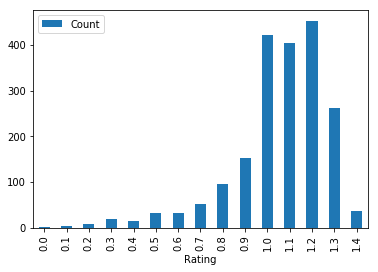

In [22]:
x = pd.DataFrame(df_master.rating.value_counts())
x.rename(columns={'rating':'Count'}, inplace=True)
x.index.name = 'Rating'
x = x.sort_index()
x.plot(kind='bar')

##### Insights:<br>
The 3 most common ratings are 1.2,1.0,1.1

##### Questiong: Which is the most famous dog stage?

(-1.2886218106345648,
 1.2340081514517964,
 -1.2358555562048539,
 1.210940261494116)

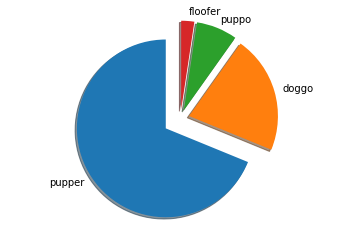

In [23]:
# Plot the data partitioned by dog stages

dog_stage_count = list(df_master[df_master['stage'] != 'None']['stage'].value_counts())[0:4]
dog_stages = df_master[df_master['stage'] != 'None']['stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'')

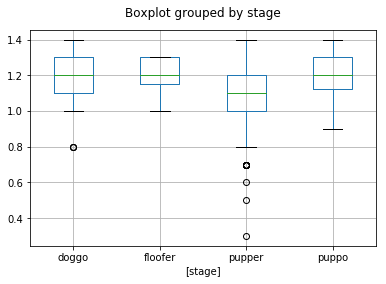

In [24]:
# Plot the dog stages with ratings
df_master[df_master['stage'] != 'None'].boxplot(column = ['rating'], by = ['stage'])
plt.title('')

In [34]:
df_master[df_master['stage'] != 'None'].groupby('stage')['rating'].mean()

stage
doggo      1.188889
floofer    1.200000
pupper     1.063547
puppo      1.200000
Name: rating, dtype: float64

##### Insight: Puppers represent the big number of our pie, but it has the lowest mean rating

##### Question: Which are the famous breeds of dogs?

In [27]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

df_master.apply(breed_conf, axis = 1)

df_master['breed'] = breed
df_master['confidence'] = conf

In [28]:
#removing the processed columns
df_master.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

In [29]:
#Test
df_master.loc[df_master['breed'] == 'Unidentifiable', 'breed'] = None
df_master.head()

,tweet_id,date,time,name,stage,favorite_count,full_text,retweet_count,jpg_url,img_num,rating,breed,confidence
0,892420643555336193,08-01-2017,16:23,Phineas,None,38659,This is Phineas. He's a mystical boy. Only eve...,8548,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1.3,None,0.000000
1,892177421306343426,08-01-2017,00:17,Tilly,None,33125,This is Tilly. She's just checking pup on you....,6286,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1.3,Chihuahua,0.323581
2,891815181378084864,07-31-2017,00:18,Archie,None,24936,This is Archie. He is a rare Norwegian Pouncin...,4166,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1.2,Chihuahua,0.716012
3,891689557279858688,07-30-2017,15:58,Darla,None,42035,This is Darla. She commenced a snooze mid meal...,8679,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1.3,Labrador_retriever,0.168086
4,891327558926688256,07-29-2017,16:00,Franklin,None,40196,This is Franklin. He would like you to stop ca...,9436,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1.2,basset,0.555712


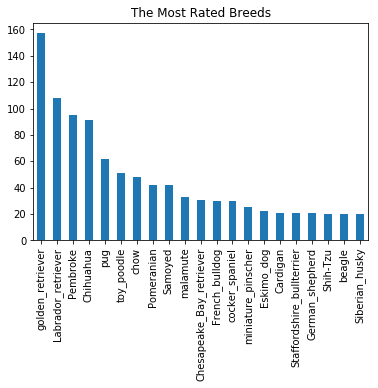

In [30]:
top=df_master.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');

##### Insight: Top two famous breeds are : Golden_retriver and Labrador_retriver according to a neural network that can classify breeds of dogs. <br>
It's difficult to know why these breeds are the top breeds. It could be because they are commonly owned. Or they could be the easiest to identify by the AI that identified them.

##### Question: is there a relation between favorite_count and retweet_count?

Text(0.5,1,'Retweets and favorites Scatter plot')

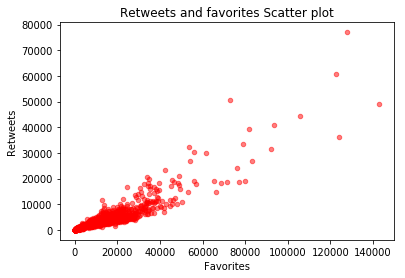

In [31]:
df_master.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'red')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

Text(0.5,1,'Correlation Map')

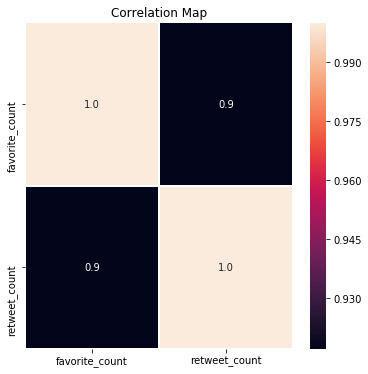

In [38]:
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df_master[['favorite_count','retweet_count']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map')

##### Insight: If the count of retweet is high the count of favorites go high